In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load data
df = pd.read_csv('owid-covid-data.csv') 
print("Columns:\n", df.columns)

Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

In [4]:
print("\nPreview:\n", df.head())




Preview:
   iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN 

In [3]:

print("\nMissing values:\n", df.isnull().sum())


Missing values:
 iso_code                                       0
continent                                   3358
location                                       0
date                                           0
total_cases                                   14
                                           ...  
population                                     1
excess_mortality_cumulative_absolute       25466
excess_mortality_cumulative                25466
excess_mortality                           25466
excess_mortality_cumulative_per_million    25466
Length: 67, dtype: int64


In [20]:

# Filter by accurate names
countries = ['Australia', 'Algeria', 'Argentina']  
df = df[df['location'].isin(countries)]

# Show result
print(df.head())


     iso_code continent location        date  total_cases  new_cases  \
5022      DZA    Africa  Algeria  2020-01-05          0.0        0.0   
5023      DZA    Africa  Algeria  2020-01-06          0.0        0.0   
5024      DZA    Africa  Algeria  2020-01-07          0.0        0.0   
5025      DZA    Africa  Algeria  2020-01-08          0.0        0.0   
5026      DZA    Africa  Algeria  2020-01-09          0.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5022                 NaN           0.0         0.0                  NaN  ...   
5023                 NaN           0.0         0.0                  NaN  ...   
5024                 NaN           0.0         0.0                  NaN  ...   
5025                 NaN           0.0         0.0                  NaN  ...   
5026                 NaN           0.0         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
5022        

In [22]:
df = df.dropna(subset=['date', 'total_cases'])
print(df.head()) 

     iso_code continent location        date  total_cases  new_cases  \
5022      DZA    Africa  Algeria  2020-01-05          0.0        0.0   
5023      DZA    Africa  Algeria  2020-01-06          0.0        0.0   
5024      DZA    Africa  Algeria  2020-01-07          0.0        0.0   
5025      DZA    Africa  Algeria  2020-01-08          0.0        0.0   
5026      DZA    Africa  Algeria  2020-01-09          0.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5022                 NaN           0.0         0.0                  NaN  ...   
5023                 NaN           0.0         0.0                  NaN  ...   
5024                 NaN           0.0         0.0                  NaN  ...   
5025                 NaN           0.0         0.0                  NaN  ...   
5026                 NaN           0.0         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
5022        

In [25]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].head())        
print(df.dtypes)                


5022   2020-01-05
5023   2020-01-06
5024   2020-01-07
5025   2020-01-08
5026   2020-01-09
Name: date, dtype: datetime64[ns]
iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object


In [27]:
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')



# Preview cleaned data
print(df.head())

     iso_code continent location       date  total_cases  new_cases  \
5022      DZA    Africa  Algeria 2020-01-05          0.0        0.0   
5023      DZA    Africa  Algeria 2020-01-06          0.0        0.0   
5024      DZA    Africa  Algeria 2020-01-07          0.0        0.0   
5025      DZA    Africa  Algeria 2020-01-08          0.0        0.0   
5026      DZA    Africa  Algeria 2020-01-09          0.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5022                 NaN           0.0         0.0                  NaN  ...   
5023                 NaN           0.0         0.0                  NaN  ...   
5024                 NaN           0.0         0.0                  NaN  ...   
5025                 NaN           0.0         0.0                  NaN  ...   
5026                 NaN           0.0         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
5022          30.4

In [28]:

df[numeric_cols] = df[numeric_cols].fillna(0)
print(df.head())

     iso_code continent location       date  total_cases  new_cases  \
5022      DZA    Africa  Algeria 2020-01-05          0.0        0.0   
5023      DZA    Africa  Algeria 2020-01-06          0.0        0.0   
5024      DZA    Africa  Algeria 2020-01-07          0.0        0.0   
5025      DZA    Africa  Algeria 2020-01-08          0.0        0.0   
5026      DZA    Africa  Algeria 2020-01-09          0.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
5022                 NaN           0.0         0.0                  NaN  ...   
5023                 NaN           0.0         0.0                  NaN  ...   
5024                 NaN           0.0         0.0                  NaN  ...   
5025                 NaN           0.0         0.0                  NaN  ...   
5026                 NaN           0.0         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
5022          30.4

In [29]:
print(df.describe())  # Summary stats for numeric columns


                      date   total_cases      new_cases  new_cases_smoothed  \
count                 5022  5.022000e+03    5022.000000         5007.000000   
mean   2022-04-20 12:00:00  4.073599e+06    4427.422939         4440.674319   
min    2020-01-05 00:00:00  0.000000e+00       0.000000            0.000000   
25%    2021-02-26 00:00:00  1.141040e+05       0.000000            5.571000   
50%    2022-04-20 12:00:00  2.720230e+05       0.000000          238.143000   
75%    2023-06-13 00:00:00  9.891139e+06       0.000000         2544.857000   
max    2024-08-04 00:00:00  1.186116e+07  770687.000000       110098.143000   
std                    NaN  4.733156e+06   32743.758388        11692.282853   

        total_deaths   new_deaths  new_deaths_smoothed  \
count    5022.000000  5022.000000          5006.000000   
mean    37394.369773    32.428515            32.531992   
min         0.000000     0.000000             0.000000   
25%      2659.000000     0.000000             0.000000  

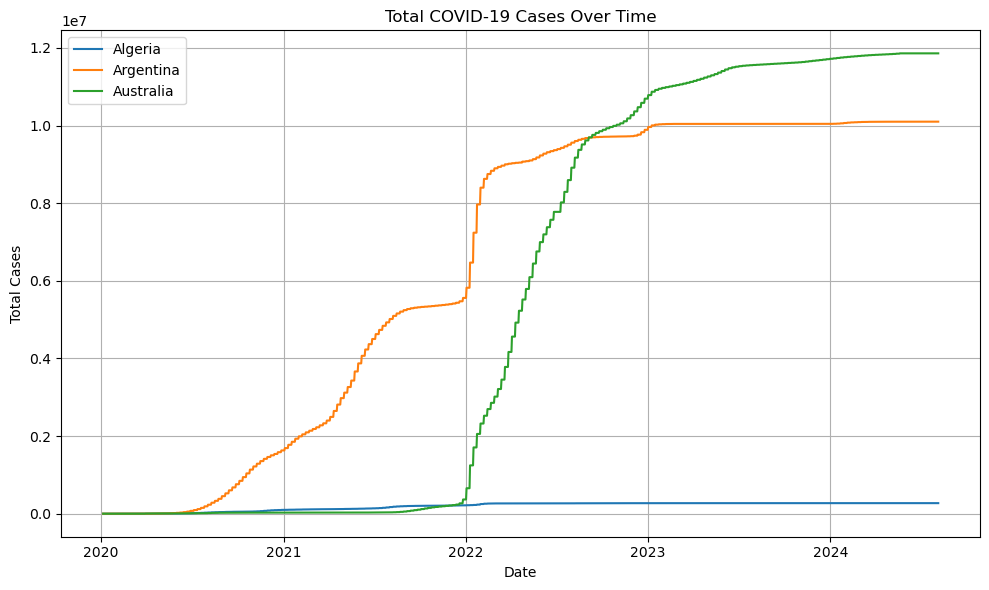

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('owid-covid-data.csv')   # Replace with your actual file path

# Clean whitespace and missing values
df['location'] = df['location'].str.strip()
df = df.dropna(subset=['date', 'total_cases'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
countries = ['Australia', 'Algeria', 'Argentina']
df = df[df['location'].isin(countries)]

# Plot total cases over time for each country
plt.figure(figsize=(10, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Add plot formatting
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


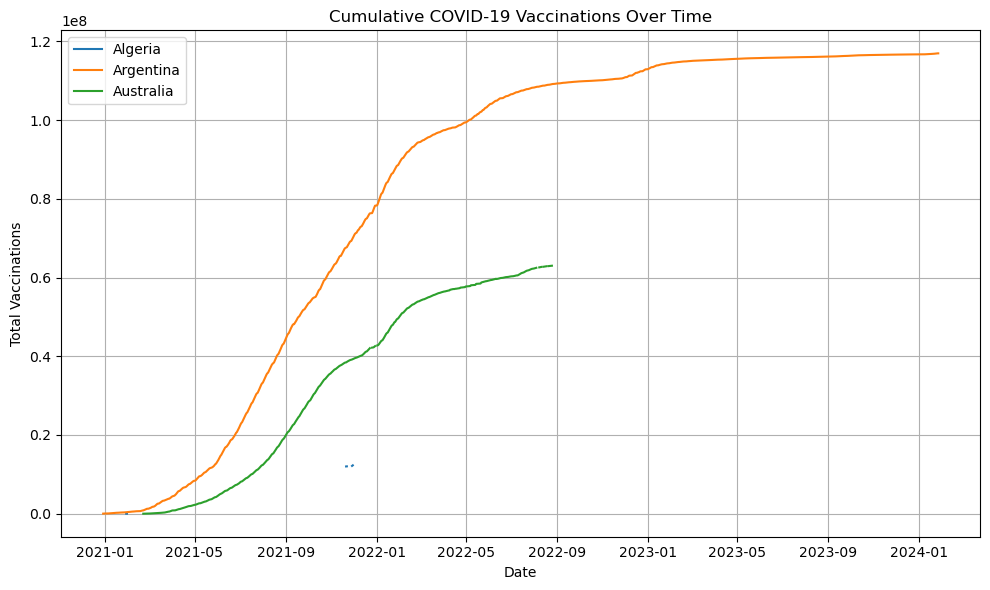

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
df['total_vaccinations'] = df['total_vaccinations'].interpolate()


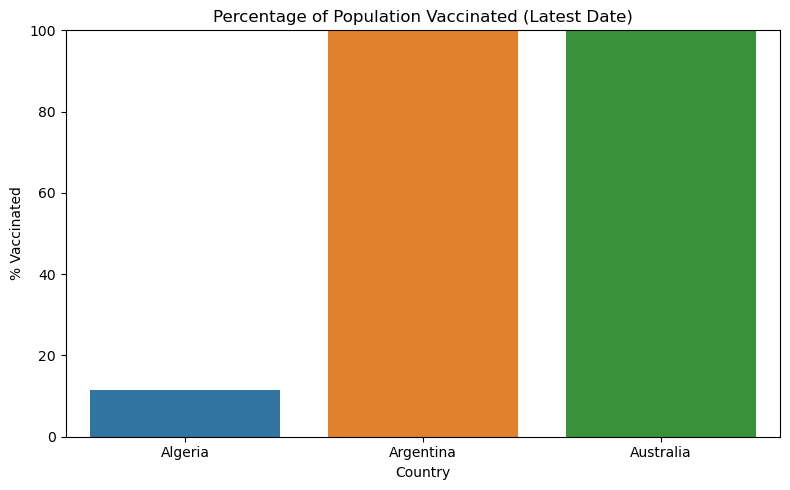

In [37]:
# Calculate % vaccinated = total_vaccinations / population (assuming 'population' column exists)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date].copy()

# Drop rows where data is missing
latest_data = latest_data.dropna(subset=['total_vaccinations', 'population'])

# Add % vaccinated column
latest_data['percent_vaccinated'] = (latest_data['total_vaccinations'] / latest_data['population']) * 100

# Bar chart
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(data=latest_data, x='location', y='percent_vaccinated')
plt.title("Percentage of Population Vaccinated (Latest Date)")
plt.ylabel("% Vaccinated")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Skipping Australia due to invalid percentage: 266.21%


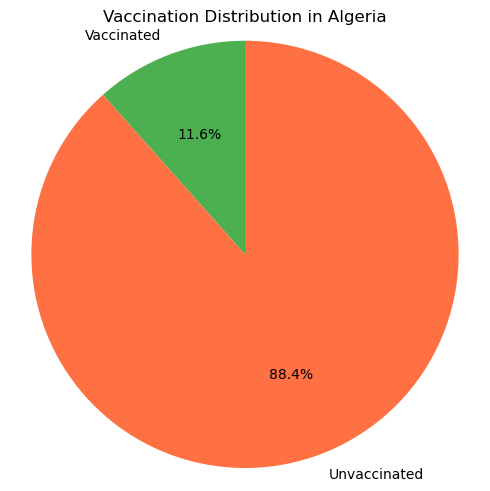

Skipping Argentina due to invalid percentage: 176.18%


In [39]:
for country in ['Australia', 'Algeria', 'Argentina']:
    country_data = latest_data[latest_data['location'] == country]
    if not country_data.empty:
        vaccinated = country_data['percent_vaccinated'].values[0]
        unvaccinated = 100 - vaccinated

    
        if vaccinated < 0 or unvaccinated < 0 or vaccinated > 100:
            print(f"Skipping {country} due to invalid percentage: {vaccinated:.2f}%")
            continue

        # Plot pie chart
        plt.figure(figsize=(5, 5))
        plt.pie([vaccinated, unvaccinated],
                labels=['Vaccinated', 'Unvaccinated'],
                autopct='%1.1f%%',
                startangle=90,
                colors=['#4CAF50', '#FF7043'])
        plt.title(f"Vaccination Distribution in {country}")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


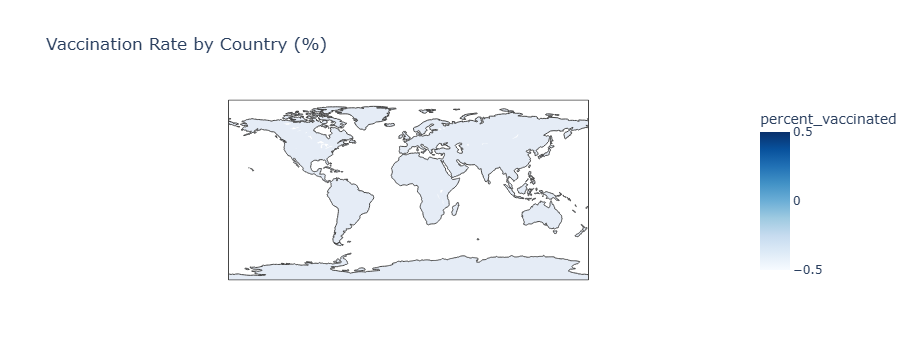

In [43]:
import plotly.express as px

# Filter to latest date
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date].copy()

# Filter to selected countries
selected_countries = ['Australia', 'Algeria', 'Argentina']
latest_df = latest_df[latest_df['location'].isin(selected_countries)].copy()

# Calculate % vaccinated
latest_df['percent_vaccinated'] = (latest_df['people_vaccinated'] / latest_df['population']) * 100

# Plot choropleth
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="percent_vaccinated",
    hover_name="location",
    color_continuous_scale="Blues",
    title="Vaccination Rate by Country (%)"
)
fig.show()


In [45]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's already loaded as df)
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries and latest data
selected_countries = ['Australia', 'Algeria', 'Argentina']
df_selected = df[df['location'].isin(selected_countries)]

latest_date = df['date'].max()
latest_df = df_selected[df_selected['date'] == latest_date].copy()
latest_df['percent_vaccinated'] = (latest_df['people_vaccinated'] / latest_df['population']) * 100


/tmp/ipykernel_239/2436574337.py:7: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



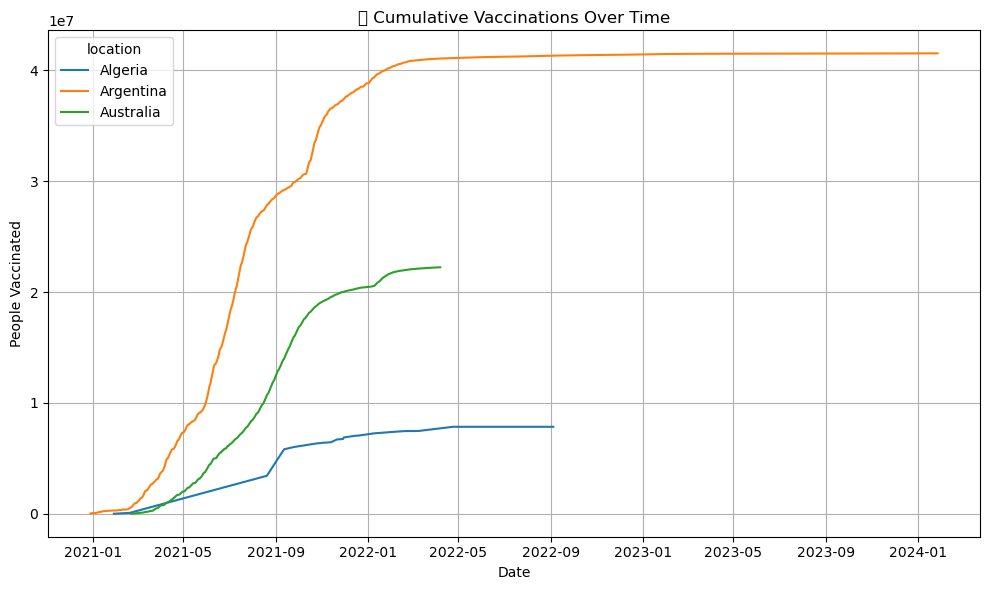

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selected, x='date', y='people_vaccinated', hue='location')
plt.title('📈 Cumulative Vaccinations Over Time')
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
### Insight 1:
**Australia** and **Argentina** show a rapid and steady increase in vaccination rollout compared to **Algeria**, which started later and progressed more slowly.

### Insight 2:
**Argentina** had an early surge in vaccinations and closely tracks Australia in cumulative doses given, although both differ slightly in population size.


SyntaxError: invalid syntax (2650204496.py, line 2)

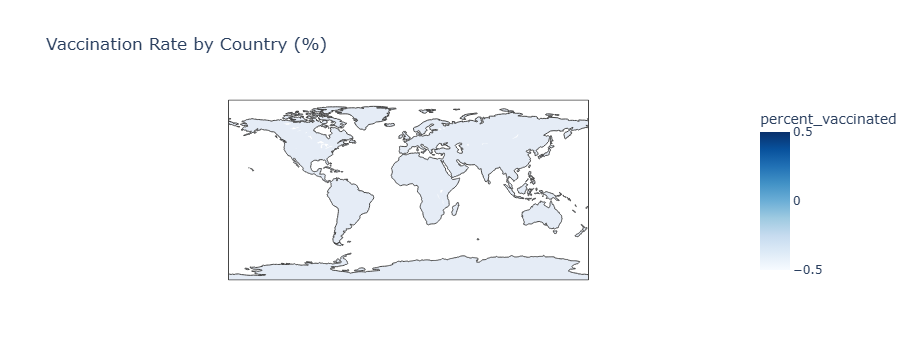

In [49]:
# Choropleth
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="percent_vaccinated",
    hover_name="location",
    color_continuous_scale="Blues",
    title="Vaccination Rate by Country (%)"
)
fig.show()


In [50]:
### Insight 3:
- **Australia** leads in percentage of the population vaccinated, nearing full coverage.
- **Algeria** significantly lags behind both Australia and Argentina in vaccination coverage.

### Insight 4:
- The disparity between Australia and Algeria may reflect access to vaccines, public health infrastructure, or vaccine hesitancy.


SyntaxError: invalid syntax (3402402262.py, line 2)

In [ ]:
## ✅ Summary of Findings

1. **Australia** had the most consistent and accelerated vaccine rollout, resulting in the highest vaccination coverage.
2. **Argentina** had a strong early phase and maintains high vaccination rates, though slightly behind Australia.
3. **Algeria** shows a delayed and slower vaccination rollout, resulting in a much lower percentage of population vaccinated.
4. Pie charts show stark differences in vaccinated vs. unvaccinated populations across these nations.
5. The choropleth map visually highlights the global disparity in vaccine distribution even among a small sample of countries.

---

📌 These insights suggest significant differences in pandemic response and health infrastructure between continents and development levels.
